In [3]:
#loada the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [4]:
#define the X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()

,x1,x2
0,0.0323,0.0244
1,0.0887,0.0244
2,0.1690,0.0163
3,0.2420,0.0000
4,0.2420,0.0488


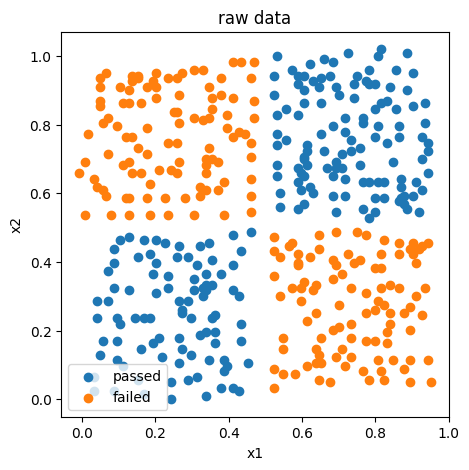

In [5]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
passed=plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed=plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [8]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)
print(X_train.shape,X_test.shape,X.shape)

(275, 2) (136, 2) (411, 2)


In [9]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=20, input_dim=2, activation='sigmoid'))
mlp.add(Dense(units=1,activation='sigmoid'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


2023-05-02 17:57:42.502852: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-02 17:57:42.503079: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
mlp.compile(optimizer='adam',loss='binary_crossentropy')


In [ ]:
mlp.fit(X_train,y_train,epochs=6000)


9/9 [==============================] - 0s 749us/step - loss: 0.0411
Epoch 3965/6000
9/9 [==============================] - 0s 865us/step - loss: 0.0411
Epoch 3966/6000
9/9 [==============================] - 0s 770us/step - loss: 0.0411
Epoch 3967/6000
9/9 [==============================] - 0s 865us/step - loss: 0.0413
Epoch 3968/6000
9/9 [==============================] - 0s 812us/step - loss: 0.0410
Epoch 3969/6000
9/9 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 3970/6000
9/9 [==============================] - 0s 894us/step - loss: 0.0411
Epoch 3971/6000
9/9 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 3972/6000
9/9 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 3973/6000
9/9 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 3974/6000
9/9 [==============================] - 0s 895us/step - loss: 0.0409
Epoch 3975/6000
9/9 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 3976/6000
9/

In [19]:
#make prediction and calculate the accuracy
y_train_predict = mlp.predict_classes(X_train)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9963636363636363


/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
#make prediction based on the test data
y_test_predict = mlp.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9926470588235294


/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
print(y_train_predict[0:10])

[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [22]:
#generate new data for plot
xx, yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_predict = mlp.predict_classes(x_range)
print(type(y_range_predict))

/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<class 'numpy.ndarray'>


In [23]:
#format the output
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)

print(y_range_predict_form)

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32


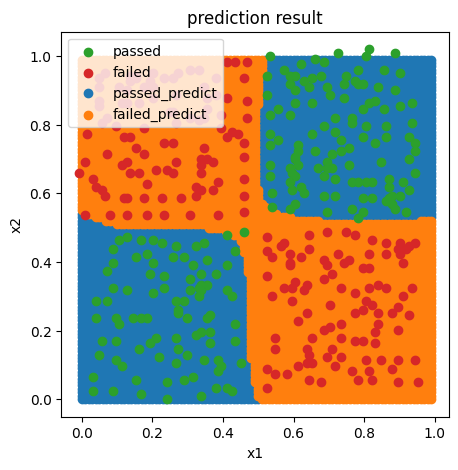

In [24]:
fig2 = plt.figure(figsize=(5,5))
passed_predict=plt.scatter(x_range[:,0][y_range_predict_form==1],x_range[:,1][y_range_predict_form==1])
failed_predict=plt.scatter(x_range[:,0][y_range_predict_form==0],x_range[:,1][y_range_predict_form==0])

passed=plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed=plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed,passed_predict,failed_predict),('passed','failed','passed_predict','failed_predict'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('prediction result')
plt.show()